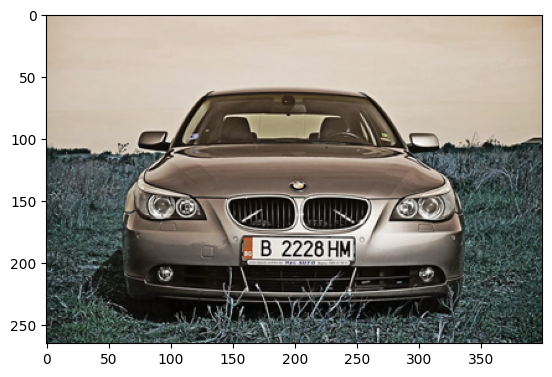

In [90]:
import cv2 as cv
import matplotlib.pyplot as plt

imagefile = "images/Cars120.png"
img = cv.imread(imagefile)

plt.imshow(img)

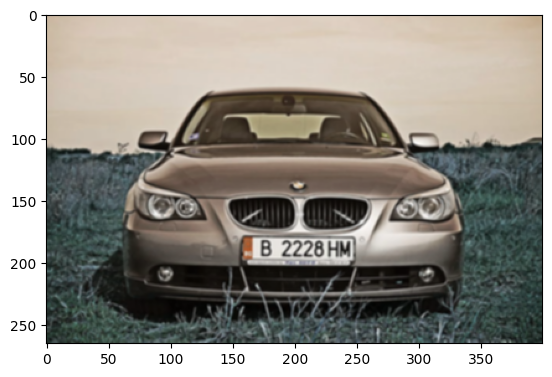

In [91]:
blur = cv.GaussianBlur(img,(3,3),0)

plt.imshow(blur)

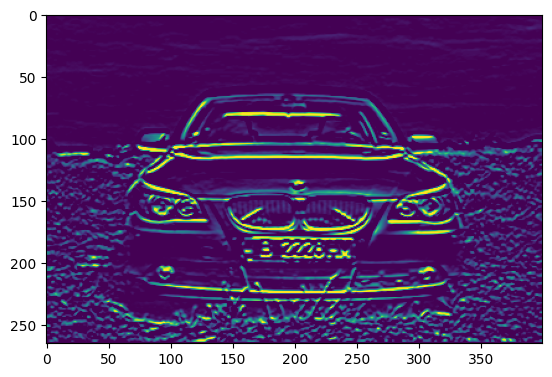

In [92]:
## vertical edge detection 

import numpy as np

image_gray = cv2.cvtColor(blur, cv.COLOR_BGR2GRAY)

# 3x3 Y-direction  kernel
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image_y = cv2.filter2D(image_gray, -1, sobel_y)

plt.imshow(filtered_image_y)

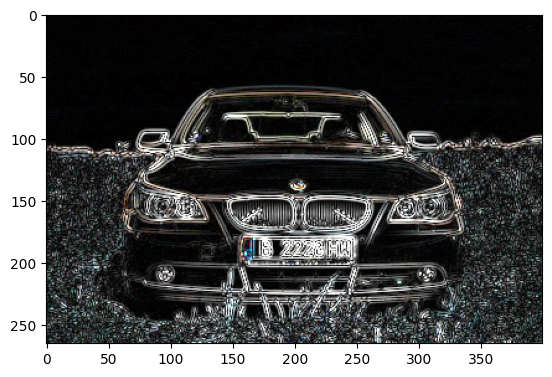

In [93]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)
filtered_image = cv2.Laplacian(blur, ksize=3, ddepth=cv2.CV_16S)
# converting back to uint8
filtered_image = cv2.convertScaleAbs(filtered_image)
plt.imshow(filtered_image)

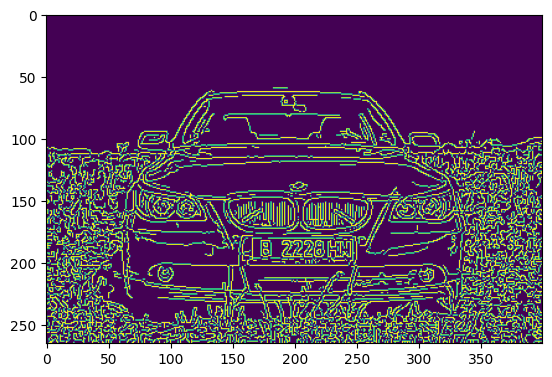

In [94]:
image_gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
filtered_image = cv2.Canny(image_gray, threshold1=50, threshold2=100)
plt.imshow(filtered_image)

In [95]:
ret, thresh1 = cv2.threshold(filtered_image, 120, 255, cv2.THRESH_BINARY + 
                                            cv2.THRESH_OTSU)  

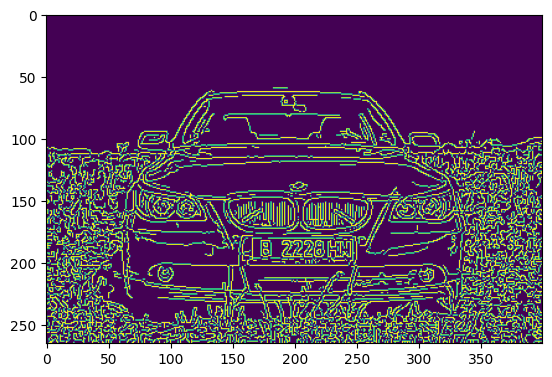

In [96]:
plt.imshow(thresh1)

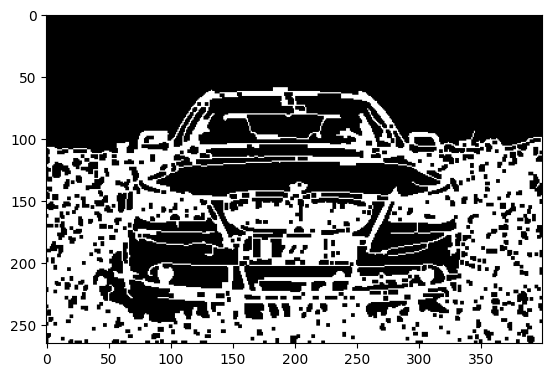

In [97]:
kernel = np.ones((3, 3), np.uint8)
  
# opening the image
closing = cv2.morphologyEx(thresh1, cv2.MORPH_CLOSE, kernel, iterations=1)
  
# print the output
plt.imshow(closing, cmap='gray')

Number of Contours found = 1


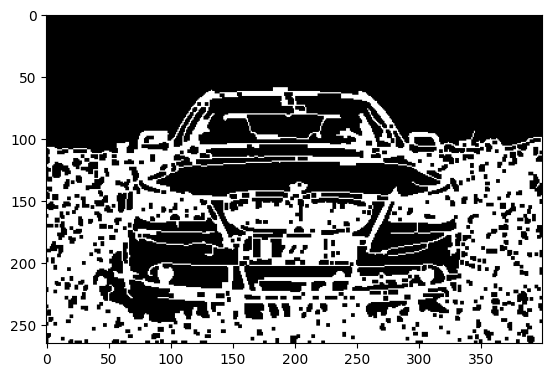

In [98]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
plt.imshow(closing, cmap='gray')

print("Number of Contours found = " + str(len(contours)))

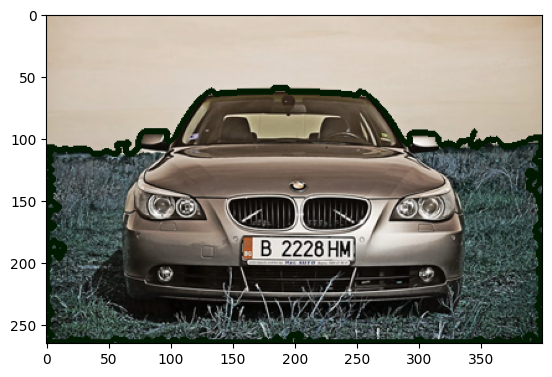

In [89]:
cv2.drawContours(img, contours, -1, (0, 25, 0), 3)
plt.imshow(img)

In [64]:
rect = cv2.minAreaRect(1)
box = cv2.boxPoints(rect) # cv2.cv.BoxPoints(rect) for OpenCV <3.x
box = np.int0(box)
cv2.drawContours(closing,[box],0,(0,0,255),2)

error: OpenCV(4.8.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/convhull.cpp:143: error: (-215:Assertion failed) total >= 0 && (depth == CV_32F || depth == CV_32S) in function 'convexHull'


In [65]:
rct = cv.minAreaRect(closing)

error: OpenCV(4.8.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/imgproc/src/convhull.cpp:143: error: (-215:Assertion failed) total >= 0 && (depth == CV_32F || depth == CV_32S) in function 'convexHull'
